# STEP 0 : IMPORT LIBRARIES

In [99]:
!pip install keras==2.6.*

  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 3.6.0 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.1.1 which is incompatible.


In [96]:
!pip install eli5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lime
from lime.lime_tabular import LimeTabularExplainer 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import mglearn


In [2]:
 #ignore warnings and other settings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.float_format = '{:.4f}'.format




# STEP 1 : IMPORT DATASET

In [3]:
training_set = pd.read_csv(r"C:\Users\Mihriban\Desktop\notebook\SI_A.csv")

In [4]:
training_set

,Participant,Anim Time to First Appearance [ms],Anim Appearance Count,Anim Visible Time [ms],Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Time to First Appearance [ms],SI Appearance Count,SI Visible Time [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms],Class
0,child1,72560,1,15333.3000,72996.9000,3965.8000,3482.4000,3659.3000,3827.4000,454.7000,3.0000,2.0000,6.7000,3385.0000,532.1000,72560,1,15333.3000,73546.2000,10430.1000,10275.3000,10438.1000,10575.3000,398.5000,2.7000,1.7000,15.3000,9855.3000,668.2000,ASD
1,child2,72560,1,15333.3000,73917.7000,3210.9000,2951.5000,3110.4000,3323.7000,308.7000,2.7000,1.7000,4.7000,2887.5000,995.6000,72560,1,15333.3000,73480.3000,10672.3000,10457.2000,10686.5000,10897.3000,179.9000,3.7000,2.7000,20.0000,9602.0000,495.9000,TD
2,child3,72560,1,15333.3000,73160.6000,9492.7000,9497.9000,9699.3000,9841.9000,1385.3000,3.0000,2.0000,7.3000,9333.9000,1297.2000,72560,1,15333.3000,74989.7000,4005.3000,3484.0000,3613.3000,3801.3000,160.1000,3.3000,2.3000,11.0000,3163.9000,277.8000,ASD
3,child4,72560,1,15333.3000,72957.1000,3014.5000,2772.0000,2864.0000,2990.5000,782.7000,2.0000,1.0000,2.3000,2772.0000,1030.4000,72560,1,15333.3000,73806.4000,12063.3000,12159.3000,12285.9000,12395.2000,422.7000,2.0000,1.0000,11.3000,11870.0000,1032.1000,ASD
4,child5,72560,1,15333.3000,78612.2000,3932.6000,2977.8000,3241.5000,3432.3000,95.3000,4.7000,3.7000,12.3000,2691.7000,207.8000,72560,1,15333.3000,79304.0000,1237.3000,681.4000,841.9000,981.9000,96.2000,3.7000,2.7000,4.3000,614.6000,146.0000,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,child129,72560,1,15333.3000,73043.5000,2296.2000,2110.8000,2230.8000,2362.8000,326.6000,2.3000,1.3000,4.7000,2018.9000,392.5000,72560,1,15333.3000,73204.7000,12668.4000,12628.6000,12760.6000,12885.9000,692.1000,2.7000,1.7000,15.3000,12215.3000,829.0000,TD
129,child130,72560,1,15333.3000,73824.9000,3696.8000,3540.8000,3620.9000,3728.9000,398.0000,2.0000,1.0000,5.3000,3345.5000,727.5000,72560,1,15333.3000,74468.9000,11013.6000,11041.9000,11149.9000,11300.6000,389.3000,2.3000,1.3000,19.7000,10240.3000,530.7000,TD
130,child131,72560,1,15333.3000,79478.7000,2634.1000,5347.2000,5806.7000,3769.2000,591.0000,3.0000,2.0000,12.0000,631.8000,641.1000,72560,1,15333.3000,79804.4000,3655.7000,2532.0000,3390.5000,2798.7000,151.8000,2.3000,1.7000,8.0000,2193.9000,212.3000,ASD
131,child132,72560,1,15333.3000,73179.0000,2934.6000,2754.5000,2954.7000,3158.7000,338.7000,2.7000,1.7000,5.7000,2526.6000,572.9000,72560,1,15333.3000,72879.5000,8963.2000,6851.2000,7296.6000,7627.4000,130.7000,6.0000,5.0000,20.7000,4838.9000,349.8000,TD


In [5]:
training_set.describe() # more info

,Anim Time to First Appearance [ms],Anim Appearance Count,Anim Visible Time [ms],Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Time to First Appearance [ms],SI Appearance Count,SI Visible Time [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms]
count,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000,133.0000
mean,72289.3233,1.0000,15313.2504,74441.7180,4514.9880,4404.6684,4550.1090,4674.7421,579.4150,2.4383,1.5218,7.2451,4005.8684,734.9917,72560.0000,1.0000,15323.2759,73553.4857,8218.7519,7989.3609,8162.7609,8279.7113,302.8917,2.8015,1.8038,14.7887,7448.2278,508.0203
std,2198.9247,0.0000,162.8792,2528.3266,2995.1351,2985.7167,3025.9991,3033.9617,663.5215,0.8298,1.0386,4.3675,2887.2189,635.0851,0.0000,0.0000,81.4335,2446.9260,3729.1879,3804.5555,3775.1722,3791.4834,283.0482,0.9375,0.8763,7.0007,3652.6890,263.0015
min,54560.0000,1.0000,14000.0000,67473.9000,800.8000,590.8000,642.8000,744.5000,95.3000,1.0000,0.0000,2.0000,561.5000,102.1000,72560.0000,1.0000,14666.7000,63863.3000,1029.5000,541.4000,577.4000,612.1000,60.0000,1.0000,0.0000,2.3000,473.4000,29.3000
25%,72560.0000,1.0000,15333.3000,73208.9000,2148.5000,2090.3000,2151.5000,2305.3000,286.7000,1.7000,1.0000,3.7000,1858.9000,421.7000,72560.0000,1.0000,15333.3000,73074.5000,5361.7000,4829.8000,5071.5000,5268.5000,195.3000,2.3000,1.3000,10.7000,4413.4000,317.9000
50%,72560.0000,1.0000,15333.3000,73690.2000,3441.7000,3359.9000,3551.9000,3718.5000,376.0000,2.3000,1.3000,6.3000,2782.6000,553.2000,72560.0000,1.0000,15333.3000,73337.3000,8429.6000,7786.5000,7949.2000,8177.1000,257.4000,2.7000,1.7000,14.0000,7283.1000,444.8000
75%,72560.0000,1.0000,15333.3000,75180.8000,6678.0000,6539.4000,6669.9000,6819.4000,597.5000,3.0000,2.0000,9.0000,5834.3000,872.9000,72560.0000,1.0000,15333.3000,74148.7000,11568.6000,11315.3000,11488.6000,11594.1000,338.8000,3.3000,2.3000,18.3000,10608.8000,665.4000
max,72560.0000,1.0000,15333.3000,83666.9000,13106.6000,13051.4000,13149.9000,13224.6000,5587.0000,5.3000,9.0000,24.0000,12751.0000,5767.0000,72560.0000,1.0000,15333.3000,80222.3000,14450.0000,14577.4000,14638.2000,14682.2000,3006.2000,6.0000,5.0000,41.3000,13855.0000,1891.5000


In [6]:
training_set.info() # check if there is any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Participant                          133 non-null    object 
 1   Anim Time to First Appearance [ms]   133 non-null    int64  
 2   Anim Appearance Count                133 non-null    int64  
 3   Anim Visible Time [ms]               133 non-null    float64
 4   Anim Entry Time [ms]                 133 non-null    float64
 5   Anim Net Dwell Time [ms]             133 non-null    float64
 6   Anim Dwell Time [ms]                 133 non-null    float64
 7   Anim Glance Duration [ms]            133 non-null    float64
 8   Anim Diversion Duration [ms]         133 non-null    float64
 9   Anim First Fixation Duration [ms]    133 non-null    float64
 10  Anim Glances Count                   133 non-null    float64
 11  Anim Revisits                   

# STEP 3 : VISUALIZE DATASET

<AxesSubplot:xlabel='Class', ylabel='count'>

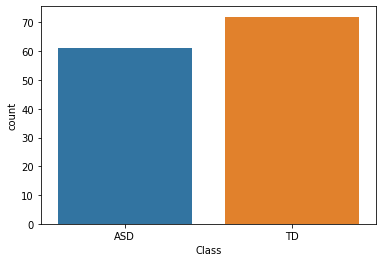

In [7]:
sns.countplot(training_set['Class'], label='Count')

In [8]:
td = training_set[training_set['Class']=='TD']

In [9]:
asd = training_set[training_set['Class']=='ASD']

In [10]:
td

,Participant,Anim Time to First Appearance [ms],Anim Appearance Count,Anim Visible Time [ms],Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Time to First Appearance [ms],SI Appearance Count,SI Visible Time [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms],Class
1,child2,72560,1,15333.3000,73917.7000,3210.9000,2951.5000,3110.4000,3323.7000,308.7000,2.7000,1.7000,4.7000,2887.5000,995.6000,72560,1,15333.3000,73480.3000,10672.3000,10457.2000,10686.5000,10897.3000,179.9000,3.7000,2.7000,20.0000,9602.0000,495.9000,TD
5,child6,72560,1,15333.3000,77367.0000,800.8000,590.8000,642.8000,744.5000,286.7000,1.7000,0.7000,2.7000,561.5000,215.7000,72560,1,15333.3000,74088.6000,8699.9000,7697.0000,7832.3000,7964.3000,258.7000,2.3000,1.3000,21.3000,6815.7000,340.4000,TD
8,child9,72560,1,15333.3000,73514.1000,2072.5000,1943.9000,2047.6000,2192.4000,268.7000,2.3000,1.7000,5.0000,1840.8000,444.2000,72560,1,15333.3000,73267.1000,12114.1000,11857.4000,11985.9000,12108.5000,430.9000,2.3000,1.3000,27.7000,10904.8000,406.9000,TD
14,child15,72560,1,15333.3000,76101.2000,1263.4000,1174.0000,1232.7000,1330.0000,234.7000,2.0000,1.0000,3.3000,1134.3000,332.2000,72560,1,15333.3000,73304.8000,12985.9000,12900.7000,13014.0000,13090.1000,209.4000,2.3000,1.3000,19.7000,12272.2000,660.0000,TD
15,child16,72560,1,15333.3000,77147.5000,3194.7000,3097.1000,3177.1000,3309.0000,321.2000,2.0000,1.0000,4.7000,2978.5000,809.3000,72560,1,15333.3000,73263.7000,11723.3000,11751.4000,11886.1000,11987.4000,297.2000,2.0000,1.0000,18.7000,10913.9000,585.4000,TD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,child128,72560,1,15333.3000,78087.1000,1687.8000,1557.3000,1667.9000,1773.3000,230.3000,2.0000,1.0000,4.7000,1458.9000,307.2000,72560,1,15333.3000,73094.2000,13001.6000,12616.2000,12716.2000,12840.1000,632.9000,2.3000,1.3000,17.7000,11857.4000,668.6000,TD
128,child129,72560,1,15333.3000,73043.5000,2296.2000,2110.8000,2230.8000,2362.8000,326.6000,2.3000,1.3000,4.7000,2018.9000,392.5000,72560,1,15333.3000,73204.7000,12668.4000,12628.6000,12760.6000,12885.9000,692.1000,2.7000,1.7000,15.3000,12215.3000,829.0000,TD
129,child130,72560,1,15333.3000,73824.9000,3696.8000,3540.8000,3620.9000,3728.9000,398.0000,2.0000,1.0000,5.3000,3345.5000,727.5000,72560,1,15333.3000,74468.9000,11013.6000,11041.9000,11149.9000,11300.6000,389.3000,2.3000,1.3000,19.7000,10240.3000,530.7000,TD
131,child132,72560,1,15333.3000,73179.0000,2934.6000,2754.5000,2954.7000,3158.7000,338.7000,2.7000,1.7000,5.7000,2526.6000,572.9000,72560,1,15333.3000,72879.5000,8963.2000,6851.2000,7296.6000,7627.4000,130.7000,6.0000,5.0000,20.7000,4838.9000,349.8000,TD


In [11]:
asd

,Participant,Anim Time to First Appearance [ms],Anim Appearance Count,Anim Visible Time [ms],Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Time to First Appearance [ms],SI Appearance Count,SI Visible Time [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms],Class
0,child1,72560,1,15333.3000,72996.9000,3965.8000,3482.4000,3659.3000,3827.4000,454.7000,3.0000,2.0000,6.7000,3385.0000,532.1000,72560,1,15333.3000,73546.2000,10430.1000,10275.3000,10438.1000,10575.3000,398.5000,2.7000,1.7000,15.3000,9855.3000,668.2000,ASD
2,child3,72560,1,15333.3000,73160.6000,9492.7000,9497.9000,9699.3000,9841.9000,1385.3000,3.0000,2.0000,7.3000,9333.9000,1297.2000,72560,1,15333.3000,74989.7000,4005.3000,3484.0000,3613.3000,3801.3000,160.1000,3.3000,2.3000,11.0000,3163.9000,277.8000,ASD
3,child4,72560,1,15333.3000,72957.1000,3014.5000,2772.0000,2864.0000,2990.5000,782.7000,2.0000,1.0000,2.3000,2772.0000,1030.4000,72560,1,15333.3000,73806.4000,12063.3000,12159.3000,12285.9000,12395.2000,422.7000,2.0000,1.0000,11.3000,11870.0000,1032.1000,ASD
4,child5,72560,1,15333.3000,78612.2000,3932.6000,2977.8000,3241.5000,3432.3000,95.3000,4.7000,3.7000,12.3000,2691.7000,207.8000,72560,1,15333.3000,79304.0000,1237.3000,681.4000,841.9000,981.9000,96.2000,3.7000,2.7000,4.3000,614.6000,146.0000,ASD
6,child7,72560,1,15333.3000,73482.7000,9330.4000,9074.0000,9242.5000,9427.9000,618.1000,3.7000,2.7000,16.3000,8553.5000,524.2000,72560,1,15333.3000,74328.6000,3761.6000,3621.9000,3808.5000,4037.6000,494.2000,4.0000,3.0000,9.3000,3383.9000,349.5000,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,child122,72560,1,15333.3000,74042.8000,4756.0000,6685.3000,7164.3000,7286.2000,380.4000,2.3000,1.3000,6.3000,6907.3000,1223.6000,72560,1,15333.3000,73178.0000,7136.3000,6905.7000,7015.0000,7091.0000,417.4000,1.7000,1.3000,13.3000,6408.5000,410.4000,ASD
122,child123,72560,1,15333.3000,72968.0000,9182.8000,8799.8000,9037.1000,9269.7000,193.5000,3.0000,2.0000,8.7000,8538.4000,911.0000,72560,1,15333.3000,73082.3000,4997.6000,4784.0000,5029.9000,5268.5000,196.3000,3.3000,2.3000,11.0000,4413.4000,365.7000,ASD
123,child124,72560,1,15333.3000,80305.4000,3318.4000,2934.8000,2957.3000,2966.7000,225.7000,1.0000,0.0000,7.0000,2736.6000,461.8000,72560,1,15333.3000,75040.5000,1029.5000,541.4000,577.4000,612.1000,321.3000,2.3000,1.3000,2.3000,473.4000,320.8000,ASD
125,child126,72560,1,15333.3000,76503.3000,1700.8000,1678.8000,1755.3000,1831.3000,122.3000,2.0000,1.0000,6.3000,1520.7000,223.4000,72560,1,15333.3000,78576.8000,2795.0000,2612.8000,2820.8000,2924.9000,167.9000,2.3000,1.3000,8.3000,2302.2000,249.4000,ASD


In [12]:
print('ASD = %' , 1. * len(asd)/len(training_set) * 100)
print('TD = %' , 1. * len(td)/len(training_set) * 100)

ASD = % 45.86466165413533
TD = % 54.13533834586466


In [13]:
training_set.drop(['Participant', 'Anim Time to First Appearance [ms]', 'Anim Appearance Count', 'Anim Visible Time [ms]', 'SI Time to First Appearance [ms]', 'SI Appearance Count', 'SI Visible Time [ms]' ], axis=1, inplace= True)

In [14]:
training_set

,Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms],Class
0,72996.9000,3965.8000,3482.4000,3659.3000,3827.4000,454.7000,3.0000,2.0000,6.7000,3385.0000,532.1000,73546.2000,10430.1000,10275.3000,10438.1000,10575.3000,398.5000,2.7000,1.7000,15.3000,9855.3000,668.2000,ASD
1,73917.7000,3210.9000,2951.5000,3110.4000,3323.7000,308.7000,2.7000,1.7000,4.7000,2887.5000,995.6000,73480.3000,10672.3000,10457.2000,10686.5000,10897.3000,179.9000,3.7000,2.7000,20.0000,9602.0000,495.9000,TD
2,73160.6000,9492.7000,9497.9000,9699.3000,9841.9000,1385.3000,3.0000,2.0000,7.3000,9333.9000,1297.2000,74989.7000,4005.3000,3484.0000,3613.3000,3801.3000,160.1000,3.3000,2.3000,11.0000,3163.9000,277.8000,ASD
3,72957.1000,3014.5000,2772.0000,2864.0000,2990.5000,782.7000,2.0000,1.0000,2.3000,2772.0000,1030.4000,73806.4000,12063.3000,12159.3000,12285.9000,12395.2000,422.7000,2.0000,1.0000,11.3000,11870.0000,1032.1000,ASD
4,78612.2000,3932.6000,2977.8000,3241.5000,3432.3000,95.3000,4.7000,3.7000,12.3000,2691.7000,207.8000,79304.0000,1237.3000,681.4000,841.9000,981.9000,96.2000,3.7000,2.7000,4.3000,614.6000,146.0000,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,73043.5000,2296.2000,2110.8000,2230.8000,2362.8000,326.6000,2.3000,1.3000,4.7000,2018.9000,392.5000,73204.7000,12668.4000,12628.6000,12760.6000,12885.9000,692.1000,2.7000,1.7000,15.3000,12215.3000,829.0000,TD
129,73824.9000,3696.8000,3540.8000,3620.9000,3728.9000,398.0000,2.0000,1.0000,5.3000,3345.5000,727.5000,74468.9000,11013.6000,11041.9000,11149.9000,11300.6000,389.3000,2.3000,1.3000,19.7000,10240.3000,530.7000,TD
130,79478.7000,2634.1000,5347.2000,5806.7000,3769.2000,591.0000,3.0000,2.0000,12.0000,631.8000,641.1000,79804.4000,3655.7000,2532.0000,3390.5000,2798.7000,151.8000,2.3000,1.7000,8.0000,2193.9000,212.3000,ASD
131,73179.0000,2934.6000,2754.5000,2954.7000,3158.7000,338.7000,2.7000,1.7000,5.7000,2526.6000,572.9000,72879.5000,8963.2000,6851.2000,7296.6000,7627.4000,130.7000,6.0000,5.0000,20.7000,4838.9000,349.8000,TD


<AxesSubplot:>

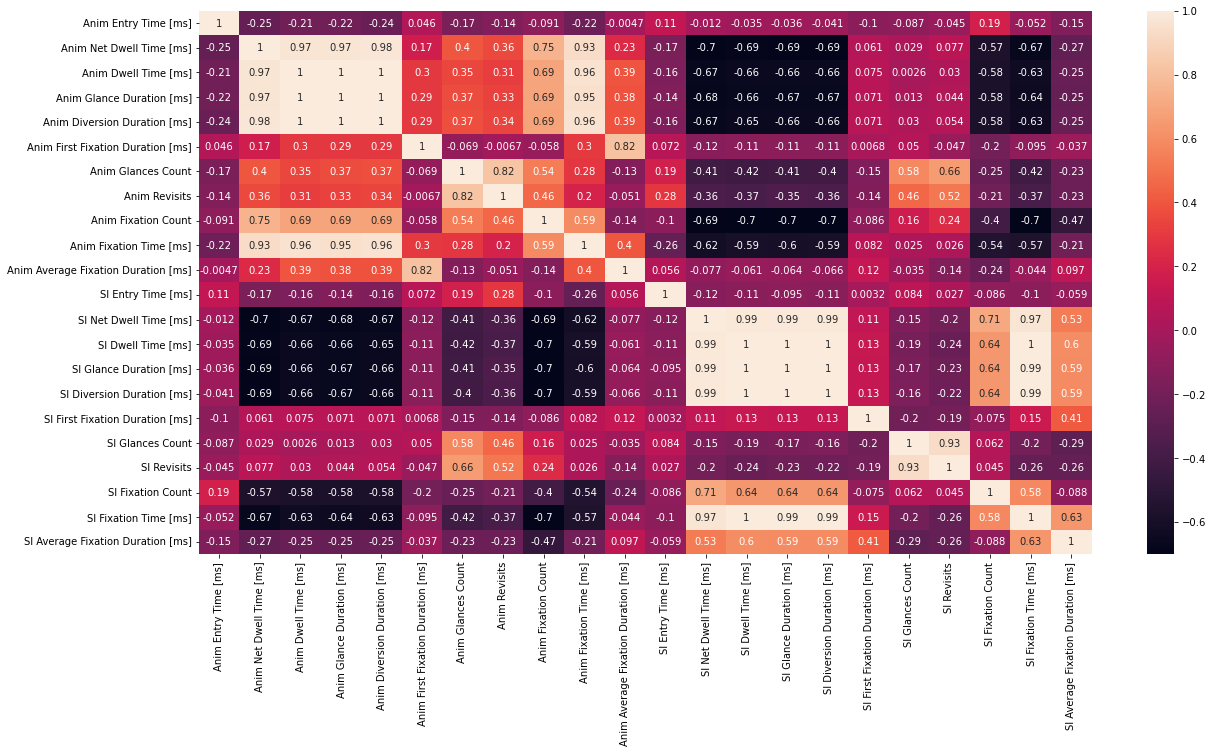

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(training_set.corr(), annot= True)

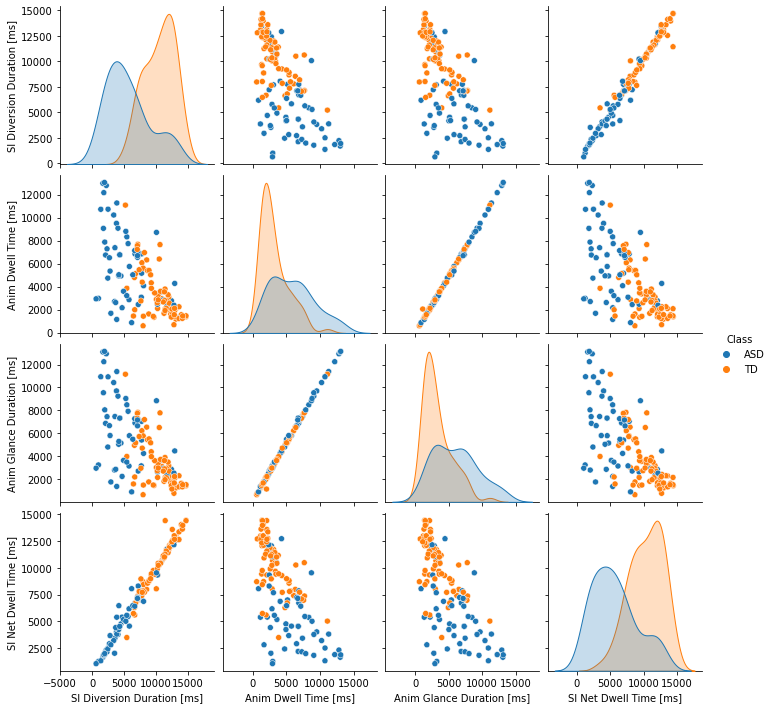

In [16]:
sns.pairplot(training_set, hue = 'Class', vars =['SI Diversion Duration [ms]','Anim Dwell Time [ms]','Anim Glance Duration [ms]','SI Net Dwell Time [ms]'])

# STEP 4 : CREATE TESTING AND TRAINING DATASET

In [17]:
training_set

,Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms],Class
0,72996.9000,3965.8000,3482.4000,3659.3000,3827.4000,454.7000,3.0000,2.0000,6.7000,3385.0000,532.1000,73546.2000,10430.1000,10275.3000,10438.1000,10575.3000,398.5000,2.7000,1.7000,15.3000,9855.3000,668.2000,ASD
1,73917.7000,3210.9000,2951.5000,3110.4000,3323.7000,308.7000,2.7000,1.7000,4.7000,2887.5000,995.6000,73480.3000,10672.3000,10457.2000,10686.5000,10897.3000,179.9000,3.7000,2.7000,20.0000,9602.0000,495.9000,TD
2,73160.6000,9492.7000,9497.9000,9699.3000,9841.9000,1385.3000,3.0000,2.0000,7.3000,9333.9000,1297.2000,74989.7000,4005.3000,3484.0000,3613.3000,3801.3000,160.1000,3.3000,2.3000,11.0000,3163.9000,277.8000,ASD
3,72957.1000,3014.5000,2772.0000,2864.0000,2990.5000,782.7000,2.0000,1.0000,2.3000,2772.0000,1030.4000,73806.4000,12063.3000,12159.3000,12285.9000,12395.2000,422.7000,2.0000,1.0000,11.3000,11870.0000,1032.1000,ASD
4,78612.2000,3932.6000,2977.8000,3241.5000,3432.3000,95.3000,4.7000,3.7000,12.3000,2691.7000,207.8000,79304.0000,1237.3000,681.4000,841.9000,981.9000,96.2000,3.7000,2.7000,4.3000,614.6000,146.0000,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,73043.5000,2296.2000,2110.8000,2230.8000,2362.8000,326.6000,2.3000,1.3000,4.7000,2018.9000,392.5000,73204.7000,12668.4000,12628.6000,12760.6000,12885.9000,692.1000,2.7000,1.7000,15.3000,12215.3000,829.0000,TD
129,73824.9000,3696.8000,3540.8000,3620.9000,3728.9000,398.0000,2.0000,1.0000,5.3000,3345.5000,727.5000,74468.9000,11013.6000,11041.9000,11149.9000,11300.6000,389.3000,2.3000,1.3000,19.7000,10240.3000,530.7000,TD
130,79478.7000,2634.1000,5347.2000,5806.7000,3769.2000,591.0000,3.0000,2.0000,12.0000,631.8000,641.1000,79804.4000,3655.7000,2532.0000,3390.5000,2798.7000,151.8000,2.3000,1.7000,8.0000,2193.9000,212.3000,ASD
131,73179.0000,2934.6000,2754.5000,2954.7000,3158.7000,338.7000,2.7000,1.7000,5.7000,2526.6000,572.9000,72879.5000,8963.2000,6851.2000,7296.6000,7627.4000,130.7000,6.0000,5.0000,20.7000,4838.9000,349.8000,TD


In [18]:
X = training_set.drop(['Class'], axis=1)

In [19]:
X

,Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms]
0,72996.9000,3965.8000,3482.4000,3659.3000,3827.4000,454.7000,3.0000,2.0000,6.7000,3385.0000,532.1000,73546.2000,10430.1000,10275.3000,10438.1000,10575.3000,398.5000,2.7000,1.7000,15.3000,9855.3000,668.2000
1,73917.7000,3210.9000,2951.5000,3110.4000,3323.7000,308.7000,2.7000,1.7000,4.7000,2887.5000,995.6000,73480.3000,10672.3000,10457.2000,10686.5000,10897.3000,179.9000,3.7000,2.7000,20.0000,9602.0000,495.9000
2,73160.6000,9492.7000,9497.9000,9699.3000,9841.9000,1385.3000,3.0000,2.0000,7.3000,9333.9000,1297.2000,74989.7000,4005.3000,3484.0000,3613.3000,3801.3000,160.1000,3.3000,2.3000,11.0000,3163.9000,277.8000
3,72957.1000,3014.5000,2772.0000,2864.0000,2990.5000,782.7000,2.0000,1.0000,2.3000,2772.0000,1030.4000,73806.4000,12063.3000,12159.3000,12285.9000,12395.2000,422.7000,2.0000,1.0000,11.3000,11870.0000,1032.1000
4,78612.2000,3932.6000,2977.8000,3241.5000,3432.3000,95.3000,4.7000,3.7000,12.3000,2691.7000,207.8000,79304.0000,1237.3000,681.4000,841.9000,981.9000,96.2000,3.7000,2.7000,4.3000,614.6000,146.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,73043.5000,2296.2000,2110.8000,2230.8000,2362.8000,326.6000,2.3000,1.3000,4.7000,2018.9000,392.5000,73204.7000,12668.4000,12628.6000,12760.6000,12885.9000,692.1000,2.7000,1.7000,15.3000,12215.3000,829.0000
129,73824.9000,3696.8000,3540.8000,3620.9000,3728.9000,398.0000,2.0000,1.0000,5.3000,3345.5000,727.5000,74468.9000,11013.6000,11041.9000,11149.9000,11300.6000,389.3000,2.3000,1.3000,19.7000,10240.3000,530.7000
130,79478.7000,2634.1000,5347.2000,5806.7000,3769.2000,591.0000,3.0000,2.0000,12.0000,631.8000,641.1000,79804.4000,3655.7000,2532.0000,3390.5000,2798.7000,151.8000,2.3000,1.7000,8.0000,2193.9000,212.3000
131,73179.0000,2934.6000,2754.5000,2954.7000,3158.7000,338.7000,2.7000,1.7000,5.7000,2526.6000,572.9000,72879.5000,8963.2000,6851.2000,7296.6000,7627.4000,130.7000,6.0000,5.0000,20.7000,4838.9000,349.8000


In [20]:
y = training_set['Class']

In [21]:
y

0      ASD
1       TD
2      ASD
3      ASD
4      ASD
      ... 
128     TD
129     TD
130    ASD
131     TD
132     TD
Name: Class, Length: 133, dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [23]:
X_train.shape

(93, 22)

In [24]:
y_train.shape

(93,)

In [25]:
X_test.shape

(40, 22)

In [26]:
y_test.shape

(40,)

In [27]:
#creating our model 
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
decision_tree.score(X_test, y_test)

0.8

In [28]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [29]:
feature_importances

,importance
SI Fixation Time [ms],0.4751
Anim Fixation Count,0.1059
SI Net Dwell Time [ms],0.0775
SI Diversion Duration [ms],0.0620
Anim Average Fixation Duration [ms],0.0527
SI Fixation Count,0.0433
Anim Dwell Time [ms],0.0377
SI First Fixation Duration [ms],0.0344
Anim Entry Time [ms],0.0323
SI Glances Count,0.0323


<AxesSubplot:>

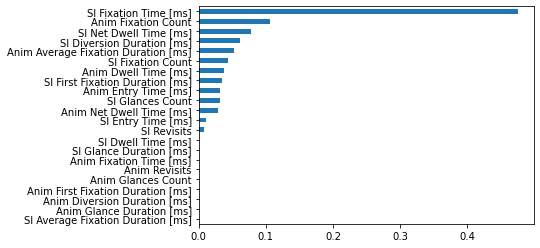

In [30]:
feat_importances= pd.Series(decision_tree.feature_importances_, index= X.columns)
feat_importances.sort_values(ascending = True).plot(kind= 'barh')

# STEP 5 : EVALUATING THE MODEL

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
y_predict_train = decision_tree.predict(X_train)

In [33]:
y_predict_train

array(['TD', 'ASD', 'TD', 'ASD', 'ASD', 'TD', 'ASD', 'TD', 'TD', 'ASD',
       'ASD', 'TD', 'ASD', 'TD', 'TD', 'TD', 'TD', 'ASD', 'TD', 'ASD',
       'TD', 'ASD', 'ASD', 'TD', 'TD', 'ASD', 'TD', 'ASD', 'ASD', 'TD',
       'TD', 'TD', 'TD', 'TD', 'TD', 'ASD', 'TD', 'ASD', 'TD', 'TD', 'TD',
       'ASD', 'ASD', 'TD', 'TD', 'ASD', 'TD', 'TD', 'TD', 'TD', 'ASD',
       'TD', 'ASD', 'ASD', 'TD', 'ASD', 'TD', 'ASD', 'TD', 'ASD', 'ASD',
       'TD', 'ASD', 'TD', 'ASD', 'ASD', 'ASD', 'TD', 'TD', 'TD', 'ASD',
       'TD', 'ASD', 'ASD', 'TD', 'ASD', 'ASD', 'TD', 'ASD', 'ASD', 'TD',
       'ASD', 'TD', 'ASD', 'ASD', 'ASD', 'ASD', 'ASD', 'TD', 'TD', 'ASD',
       'ASD', 'TD'], dtype=object)

In [34]:
cm = confusion_matrix(y_train, y_predict_train) # y_train = truth y_predict_train = prediction

<AxesSubplot:>

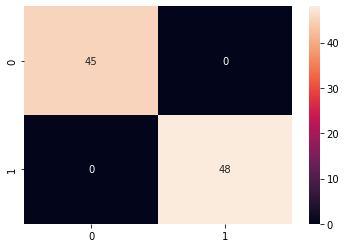

In [35]:
sns.heatmap(cm, annot= True)

In [36]:
y_predict_test = decision_tree.predict(X_test)

In [37]:
y_predict_test #compare with y_test

array(['ASD', 'ASD', 'ASD', 'TD', 'TD', 'TD', 'ASD', 'TD', 'TD', 'TD',
       'TD', 'ASD', 'TD', 'ASD', 'TD', 'TD', 'ASD', 'TD', 'TD', 'ASD',
       'TD', 'TD', 'ASD', 'TD', 'TD', 'ASD', 'ASD', 'TD', 'TD', 'TD',
       'ASD', 'TD', 'ASD', 'ASD', 'TD', 'ASD', 'ASD', 'TD', 'TD', 'TD'],
      dtype=object)

In [38]:
y_test

123    ASD
110     TD
81      TD
14      TD
102     TD
126     TD
98     ASD
17      TD
32      TD
31      TD
86      TD
54      TD
56      TD
120    ASD
117     TD
84      TD
16     ASD
18      TD
66      TD
89     ASD
3      ASD
90      TD
26     ASD
127     TD
41      TD
71     ASD
11     ASD
21      TD
124     TD
15      TD
115    ASD
68     ASD
6      ASD
122    ASD
65      TD
83      TD
97     ASD
129     TD
75     ASD
103    ASD
Name: Class, dtype: object

In [39]:
cm = confusion_matrix(y_test, y_predict_test)

<AxesSubplot:>

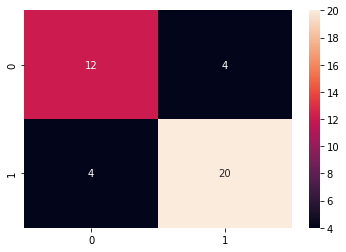

In [40]:
sns.heatmap(cm, annot= True)

In [41]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         ASD       0.75      0.75      0.75        16
          TD       0.83      0.83      0.83        24

    accuracy                           0.80        40
   macro avg       0.79      0.79      0.79        40
weighted avg       0.80      0.80      0.80        40



# STEP 5.1 : CROSS VALIDATION ON DT

In [42]:
# importing cross_val_score function
from sklearn.model_selection import cross_val_score
# 10-fold CV
scores = cross_val_score(decision_tree, X_train, y_train, scoring = 'r2', cv=10 )
scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [43]:
print (np.mean(scores)) 

nan


In [44]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict (decision_tree, X_test, y_test)
pred

array(['ASD', 'ASD', 'TD', 'TD', 'TD', 'ASD', 'ASD', 'ASD', 'ASD', 'TD',
       'ASD', 'ASD', 'TD', 'ASD', 'ASD', 'TD', 'ASD', 'TD', 'TD', 'ASD',
       'ASD', 'TD', 'ASD', 'ASD', 'TD', 'ASD', 'ASD', 'TD', 'TD', 'TD',
       'ASD', 'TD', 'ASD', 'ASD', 'TD', 'TD', 'ASD', 'TD', 'TD', 'ASD'],
      dtype=object)

In [45]:
# 10_fold CV on test data
scores_test = cross_val_score(decision_tree, X_test, y_test, cv=10)
scores_test

array([0.75, 1.  , 1.  , 0.75, 0.75, 0.5 , 1.  , 1.  , 0.75, 1.  ])

In [46]:
print(np.mean(scores_test))

0.85


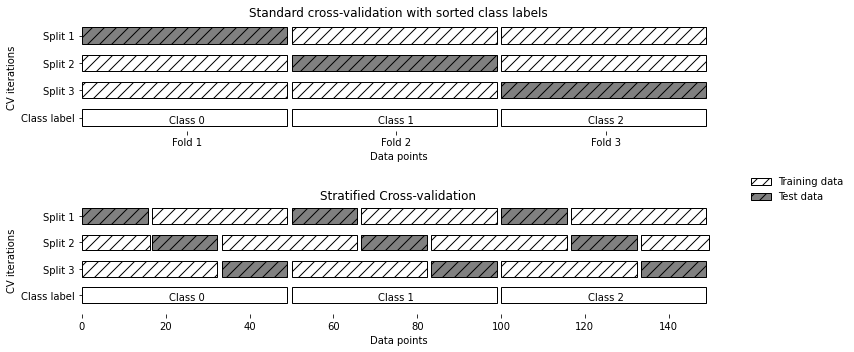

In [47]:
# stratified cv 
mglearn.plots.plot_stratified_cross_validation()

In [48]:
from sklearn.model_selection import KFold
kfold = KFold (n_splits= 3, shuffle = True, random_state= 0) 
score = cross_val_score(decision_tree, X, y,  cv=kfold, scoring= 'f1_micro')
score.mean()

0.7296296296296295

In [49]:
from sklearn.model_selection import LeaveOneOut
loo= LeaveOneOut()
scores= cross_val_score(decision_tree, X, y, cv=loo)
scores.mean()

0.7218045112781954

# STEP : 6 IMPROVING THE MODEL

In [50]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)
RandomForest.score(X_test, y_test)

0.825

In [51]:
feature_importances = pd.DataFrame(RandomForest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [52]:
feature_importances

,importance
SI Glance Duration [ms],0.1079
SI Dwell Time [ms],0.1054
SI Fixation Time [ms],0.1045
SI Diversion Duration [ms],0.0896
SI Net Dwell Time [ms],0.0762
SI Average Fixation Duration [ms],0.0716
Anim Fixation Count,0.0702
Anim Glance Duration [ms],0.0372
SI First Fixation Duration [ms],0.0348
SI Fixation Count,0.0342


<AxesSubplot:>

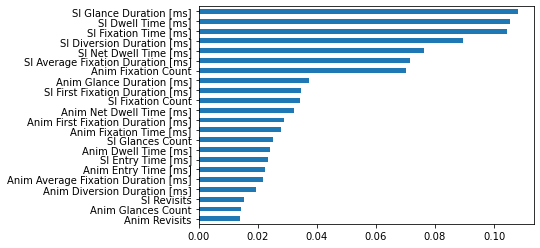

In [53]:
feat_importances= pd.Series(RandomForest.feature_importances_, index= X.columns)
feat_importances.sort_values(ascending = True).plot(kind= 'barh')

In [54]:
y_predict_train = RandomForest.predict(X_train)
y_predict_train


array(['TD', 'ASD', 'TD', 'ASD', 'ASD', 'TD', 'ASD', 'TD', 'TD', 'ASD',
       'ASD', 'TD', 'ASD', 'TD', 'TD', 'TD', 'TD', 'ASD', 'TD', 'ASD',
       'TD', 'ASD', 'ASD', 'TD', 'TD', 'ASD', 'TD', 'ASD', 'ASD', 'TD',
       'TD', 'TD', 'TD', 'TD', 'TD', 'ASD', 'TD', 'ASD', 'TD', 'TD', 'TD',
       'ASD', 'ASD', 'TD', 'TD', 'ASD', 'TD', 'TD', 'TD', 'TD', 'ASD',
       'TD', 'ASD', 'ASD', 'TD', 'ASD', 'TD', 'ASD', 'TD', 'ASD', 'ASD',
       'TD', 'ASD', 'TD', 'ASD', 'ASD', 'ASD', 'TD', 'TD', 'TD', 'ASD',
       'TD', 'ASD', 'ASD', 'TD', 'ASD', 'ASD', 'TD', 'ASD', 'ASD', 'TD',
       'ASD', 'TD', 'ASD', 'ASD', 'ASD', 'ASD', 'ASD', 'TD', 'TD', 'ASD',
       'ASD', 'TD'], dtype=object)

<AxesSubplot:>

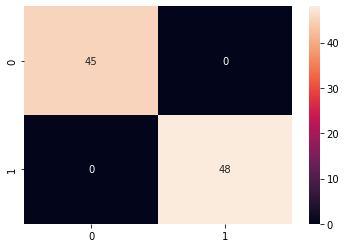

In [55]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

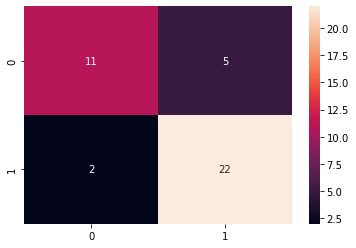

In [56]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [57]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         ASD       0.85      0.69      0.76        16
          TD       0.81      0.92      0.86        24

    accuracy                           0.82        40
   macro avg       0.83      0.80      0.81        40
weighted avg       0.83      0.82      0.82        40



# STEP 6.1 : CROSS VALIDATION ON RF

In [58]:
# importing cross_val_score function
from sklearn.model_selection import cross_val_score
# 10-fold CV
scores = cross_val_score(RandomForest, X, y, scoring = 'f1', cv=10 )
scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [59]:
print (np.mean(scores)) 

nan


In [60]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict (RandomForest, X_test, y_test)
pred

array(['ASD', 'TD', 'TD', 'TD', 'TD', 'TD', 'ASD', 'TD', 'TD', 'TD', 'TD',
       'ASD', 'TD', 'ASD', 'ASD', 'TD', 'ASD', 'TD', 'TD', 'ASD', 'TD',
       'TD', 'ASD', 'TD', 'TD', 'ASD', 'ASD', 'TD', 'TD', 'TD', 'ASD',
       'TD', 'ASD', 'ASD', 'TD', 'TD', 'ASD', 'TD', 'TD', 'TD'],
      dtype=object)

In [61]:
# 10_fold CV on test data
scores_test = cross_val_score(RandomForest, X_test, y_test, cv=10)
scores_test


array([1.  , 1.  , 0.5 , 0.75, 0.75, 0.5 , 1.  , 1.  , 0.75, 0.75])

In [62]:
print(np.mean(scores_test))

0.8


In [63]:
from sklearn.model_selection import KFold
kfold = KFold (n_splits= 3, shuffle = True, random_state= 0)  
score = cross_val_score(RandomForest, X, y,  cv=kfold)
score.mean()

0.7893939393939394

In [64]:
from sklearn.model_selection import LeaveOneOut
loo= LeaveOneOut()
scores= cross_val_score(RandomForest, X, y, cv=loo)
scores.mean()

0.7744360902255639

# STEP 7 : LIME 

In [65]:
X_test

,Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms]
123,80305.4000,3318.4000,2934.8000,2957.3000,2966.7000,225.7000,1.0000,0.0000,7.0000,2736.6000,461.8000,75040.5000,1029.5000,541.4000,577.4000,612.1000,321.3000,2.3000,1.3000,2.3000,473.4000,320.8000
110,83251.1000,1589.7000,2049.0000,1138.3000,1217.1000,391.4000,2.3000,1.3000,8.0000,1980.8000,388.4000,73757.1000,12435.0000,12332.5000,12411.2000,12475.2000,205.2000,1.7000,0.7000,16.7000,11666.0000,744.7000
81,73206.0000,7794.4000,7649.3000,7783.7000,7963.7000,249.4000,2.3000,2.0000,11.3000,7243.8000,784.1000,67774.6000,10481.9000,10250.0000,10451.6000,10612.5000,273.3000,4.0000,2.0000,16.3000,9679.0000,422.9000
14,76101.2000,1263.4000,1174.0000,1232.7000,1330.0000,234.7000,2.0000,1.0000,3.3000,1134.3000,332.2000,73304.8000,12985.9000,12900.7000,13014.0000,13090.1000,209.4000,2.3000,1.3000,19.7000,12272.2000,660.0000
102,73257.3000,1562.9000,1346.4000,1448.3000,1528.2000,456.9000,1.7000,0.7000,3.3000,1302.4000,402.7000,73971.7000,12324.0000,12200.1000,12282.7000,12399.2000,161.5000,2.0000,1.0000,23.7000,11327.6000,490.2000
126,73355.7000,4659.2000,4383.9000,4709.2000,4970.7000,256.0000,4.0000,3.0000,9.0000,4229.3000,447.0000,72834.4000,7705.7000,7228.7000,7554.0000,7832.4000,242.7000,4.3000,3.3000,14.3000,6833.8000,477.8000
98,77822.2000,2910.8000,2700.1000,2795.5000,2899.8000,335.3000,2.7000,1.7000,7.7000,2554.5000,372.7000,74936.0000,2003.6000,3328.8000,3402.1000,3504.6000,233.3000,3.0000,2.0000,6.3000,3206.8000,444.8000
17,73499.9000,3624.1000,3359.9000,3551.9000,3770.5000,633.6000,3.3000,2.3000,6.3000,3258.7000,514.8000,73031.9000,9684.3000,9519.5000,9803.3000,10032.7000,380.1000,4.3000,3.3000,13.7000,9139.8000,659.9000
32,73080.4000,2215.6000,2090.3000,2214.3000,2358.3000,481.3000,2.3000,1.3000,3.0000,2064.9000,688.3000,72995.1000,12723.6000,12759.5000,12951.6000,13111.6000,355.9000,3.3000,2.3000,20.0000,12163.5000,647.6000
31,76413.7000,1461.1000,1381.0000,1438.3000,1522.4000,588.9000,1.3000,0.3000,2.0000,1351.5000,733.3000,73799.5000,12071.8000,12181.9000,12273.9000,12349.8000,467.6000,1.7000,0.7000,12.3000,11711.6000,975.0000


In [66]:
num = 10
test_sample = X_test.iloc[num,:]

In [79]:
out = RandomForest.predict_proba(X_test)
print('Random Forest Prediction for sample', num, '=' , out[num])
print ('Actual Outcome =', y_test.iloc[num])

Random Forest Prediction for sample 10 = [0.18 0.82]
Actual Outcome = TD


In [68]:
import lime
from lime import lime_tabular

In [69]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data= X_train.values,
    feature_names=X_train.columns.values,
    class_names=['ASD', 'TD'],
    mode ='classification',
    verbose = True ,
    random_state = 0)

In [70]:
lime_exp = lime_explainer.explain_instance(
    data_row=test_sample,
    predict_fn= RandomForest.predict_proba, num_features = 22)

Intercept 0.41171268958179785
Prediction_local [0.7127037]
Right: 0.82


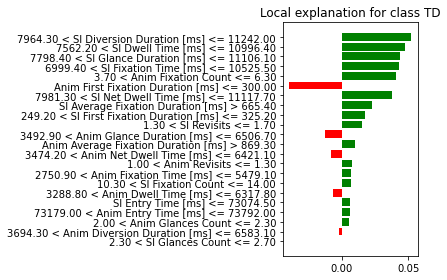

In [71]:
plt = lime_exp.as_pyplot_figure()
plt.tight_layout()

In [72]:
lime_exp.show_in_notebook(show_table=True, show_all = False)

# STEP 8 : SHAP

In [73]:
import shap

In [74]:
explainer = shap.TreeExplainer(RandomForest)
shap_values= explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

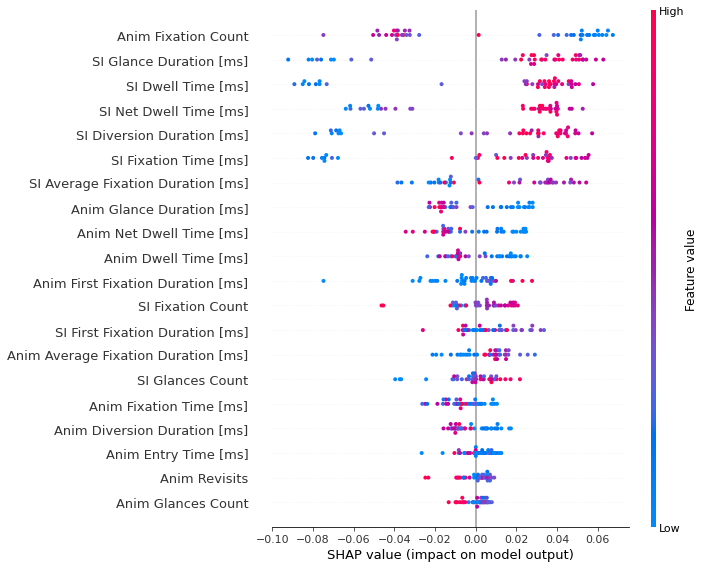

In [75]:
shap.summary_plot(shap_values[1], X_test)

In [76]:
training_set

,Anim Entry Time [ms],Anim Net Dwell Time [ms],Anim Dwell Time [ms],Anim Glance Duration [ms],Anim Diversion Duration [ms],Anim First Fixation Duration [ms],Anim Glances Count,Anim Revisits,Anim Fixation Count,Anim Fixation Time [ms],Anim Average Fixation Duration [ms],SI Entry Time [ms],SI Net Dwell Time [ms],SI Dwell Time [ms],SI Glance Duration [ms],SI Diversion Duration [ms],SI First Fixation Duration [ms],SI Glances Count,SI Revisits,SI Fixation Count,SI Fixation Time [ms],SI Average Fixation Duration [ms],Class
0,72996.9000,3965.8000,3482.4000,3659.3000,3827.4000,454.7000,3.0000,2.0000,6.7000,3385.0000,532.1000,73546.2000,10430.1000,10275.3000,10438.1000,10575.3000,398.5000,2.7000,1.7000,15.3000,9855.3000,668.2000,ASD
1,73917.7000,3210.9000,2951.5000,3110.4000,3323.7000,308.7000,2.7000,1.7000,4.7000,2887.5000,995.6000,73480.3000,10672.3000,10457.2000,10686.5000,10897.3000,179.9000,3.7000,2.7000,20.0000,9602.0000,495.9000,TD
2,73160.6000,9492.7000,9497.9000,9699.3000,9841.9000,1385.3000,3.0000,2.0000,7.3000,9333.9000,1297.2000,74989.7000,4005.3000,3484.0000,3613.3000,3801.3000,160.1000,3.3000,2.3000,11.0000,3163.9000,277.8000,ASD
3,72957.1000,3014.5000,2772.0000,2864.0000,2990.5000,782.7000,2.0000,1.0000,2.3000,2772.0000,1030.4000,73806.4000,12063.3000,12159.3000,12285.9000,12395.2000,422.7000,2.0000,1.0000,11.3000,11870.0000,1032.1000,ASD
4,78612.2000,3932.6000,2977.8000,3241.5000,3432.3000,95.3000,4.7000,3.7000,12.3000,2691.7000,207.8000,79304.0000,1237.3000,681.4000,841.9000,981.9000,96.2000,3.7000,2.7000,4.3000,614.6000,146.0000,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,73043.5000,2296.2000,2110.8000,2230.8000,2362.8000,326.6000,2.3000,1.3000,4.7000,2018.9000,392.5000,73204.7000,12668.4000,12628.6000,12760.6000,12885.9000,692.1000,2.7000,1.7000,15.3000,12215.3000,829.0000,TD
129,73824.9000,3696.8000,3540.8000,3620.9000,3728.9000,398.0000,2.0000,1.0000,5.3000,3345.5000,727.5000,74468.9000,11013.6000,11041.9000,11149.9000,11300.6000,389.3000,2.3000,1.3000,19.7000,10240.3000,530.7000,TD
130,79478.7000,2634.1000,5347.2000,5806.7000,3769.2000,591.0000,3.0000,2.0000,12.0000,631.8000,641.1000,79804.4000,3655.7000,2532.0000,3390.5000,2798.7000,151.8000,2.3000,1.7000,8.0000,2193.9000,212.3000,ASD
131,73179.0000,2934.6000,2754.5000,2954.7000,3158.7000,338.7000,2.7000,1.7000,5.7000,2526.6000,572.9000,72879.5000,8963.2000,6851.2000,7296.6000,7627.4000,130.7000,6.0000,5.0000,20.7000,4838.9000,349.8000,TD


# STEP 9 : ELI 5

In [100]:
import eli5

In [101]:
import eli5
from eli5 import formatters
from IPython.display import display

In [102]:
feature_names=X_train.columns.values

In [103]:
class_names = ["ASD" , "TD"]

In [104]:
eli5.show_prediction(RandomForest,X_test.iloc[0],feature_names=feature_names,target_names = class_names)

In [105]:
eli5.show_prediction(RandomForest,X_test.iloc[10],feature_names=feature_names,target_names = class_names)

# STEP 10 : MULTI LAYER PERCEPTRON

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter = 3000, activation = 'relu')
clf.fit(X_train, y_train)

In [ ]:
pred= clf.predict(X_test)
pred

In [ ]:
# Predicting the Test set results
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

In [ ]:
clf.score(X_test, y_test)

In [ ]:
# importing cross_val_score function
from sklearn.model_selection import cross_val_score
# 10-fold CV
scores = cross_val_score(clf, X, y, scoring = 'f1', cv=10 )
scores

In [ ]:
print (np.mean(scores)) 

In [ ]:
# 10_fold CV on test data
scores_test = cross_val_score(clf, X_test, y_test, cv=10)
scores_test

In [ ]:
print(np.mean(scores_test))

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold (n_splits= 3, shuffle = True, random_state= 0)  
score = cross_val_score(clf, X, y,  cv=kfold)
score.mean()

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo= LeaveOneOut()
scores= cross_val_score(clf, X, y, cv=loo)
scores.mean()